In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [5]:
data = pd.read_csv("../datasets/TCS.csv")
data.set_index(data.columns[0], inplace=True)
data

,Mar '04,Jun '04,Sep '04,Dec '04,Mar '05,Jun '05,Sep '05,Dec '05,Mar '06,Jun '06,...,Mar '22,Jun '22,Sep '22,Dec '22,Mar '23,Jun '23,Sep '23,Dec '23,Mar '24,Jun '24
TCS,,,,,,,,,,,,,,,,,,,,,
Close,38.387501,87.25,128.387497,166.932495,179.007507,169.762497,185.294998,212.857498,239.4375,217.345001,...,3739.949951,3267.100098,3004.550049,3256.699951,3205.899902,3302.25,3528.600098,3793.399902,3876.300049,3904.149902
Net Sales/Income from operations,1700.000000,1758.22,2046.150000,2096.800000,2147.660000,2250.060000,2504.490000,2720.190000,3085.2100,3434.240000,...,42459.000000,44480.000000,46819.000000,49275.000000,49780.000000,49862.00,50165.000000,50844.000000,51488.000000,52844.000000
Employees Cost,400.000000,409.74,419.670000,459.210000,470.360000,504.280000,989.370000,1086.860000,1232.4500,1429.750000,...,21343.000000,22971.000000,23511.000000,24478.000000,25258.000000,25979.00,26018.000000,25511.000000,25631.000000,26657.000000
depreciat,29.600000,29.60,30.730000,29.630000,42.640000,46.610000,56.330000,63.250000,75.4100,68.700000,...,944.000000,960.000000,976.000000,996.000000,1008.000000,969.00,979.000000,964.000000,975.000000,969.000000
Other Expenses,850.000000,850.43,987.940000,1001.350000,1122.130000,1052.550000,759.090000,808.590000,982.9700,1091.260000,...,9404.000000,9680.000000,10526.000000,11281.000000,11652.000000,10747.00,10345.000000,10970.000000,11311.000000,11612.000000
Other Income,25.000000,25.77,10.750000,123.060000,-30.330000,26.260000,11.240000,7.740000,6.9500,31.660000,...,1981.000000,715.000000,1622.000000,1558.000000,1433.000000,1903.00,1755.000000,1809.000000,1806.000000,2417.000000
Net Profit/(Loss) For the Period,420.000000,424.60,342.190000,643.810000,426.700000,578.860000,620.320000,679.650000,750.0600,796.690000,...,9795.000000,8588.000000,10059.000000,10659.000000,9800.000000,10484.00,10929.000000,10753.000000,11393.000000,12115.000000
Basic EPS (Rs.),4.170000,4.17,4.170000,4.170000,38.150000,38.150000,38.150000,38.150000,55.5300,55.530000,...,103.240000,103.240000,103.240000,103.240000,106.880000,106.88,106.880000,106.880000,119.440000,119.440000
Book Value /Share (Rs.),12.920000,12.92,12.920000,12.920000,69.170000,69.170000,69.170000,69.170000,114.6400,114.640000,...,210.860000,210.860000,210.860000,210.860000,203.660000,203.66,203.660000,203.660000,199.230000,199.230000


In [15]:
data = data.T

In [16]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Close']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1], index=data.index)

scaler_close = MinMaxScaler()
close_scaled = scaler_close.fit_transform(data[['Close']])
close_scaled

data_scaled['Close'] = close_scaled
data_scaled

TCS,Close,Net Sales/Income from operations,Employees Cost,depreciat,Other Expenses,Other Income,Net Profit/(Loss) For the Period,Basic EPS (Rs.),Book Value /Share (Rs.),PBDIT/Share (Rs.),Net Profit/Share (Rs.),PBDIT Margin (%),Net Profit Margin (%),Return on Networth / Equity (%),Return on Capital Employed (%),Return on Assets (%),Quick Ratio (X)
Mar '04,0.000000,0.000000,0.000000,0.008346,0.093237,0.006609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064162,0.000000,0.000000,0.000000,0.000000
Jun '04,0.012640,0.000371,0.000000,0.008385,0.093504,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064162,0.000000,0.000000,0.000000,0.000000
Sep '04,0.023281,0.000749,0.001155,0.021009,0.088292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064162,0.000000,0.000000,0.000000,0.000000
Dec '04,0.033252,0.002255,0.000031,0.022240,0.127266,0.025620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064162,0.000000,0.000000,0.000000,0.000000
Mar '05,0.036376,0.002680,0.013328,0.033328,0.074037,0.007178,0.267601,0.146378,0.270134,0.265510,0.799003,0.796218,0.825465,0.503275,1.000000,0.265306,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jun '23,0.844300,0.974178,0.960139,0.916918,0.744940,0.861460,0.808868,0.496357,0.871011,0.802313,0.776174,0.719188,0.736370,0.756494,0.837107,0.367347,0.739750
Sep '23,0.902852,0.975664,0.970360,0.880014,0.693582,0.899259,0.808868,0.496357,0.871011,0.802313,0.776174,0.719188,0.736370,0.756494,0.837107,0.367347,0.739750
Dec '23,0.971351,0.956354,0.955029,0.937390,0.712321,0.884310,0.808868,0.496357,0.871011,0.802313,0.776174,0.719188,0.736370,0.756494,0.837107,0.367347,0.739750
Mar '24,0.992796,0.960925,0.966271,0.968695,0.711280,0.938672,0.907781,0.484829,0.990649,0.907642,0.818420,0.753501,1.000000,1.000000,0.928769,0.342229,0.790374


In [9]:
# Check data types and missing values
print(data_scaled.dtypes)
print(data_scaled.isnull().sum())

TCS
Close                               float64
Net Sales/Income from operations    float64
Employees Cost                      float64
depreciat                           float64
Other Expenses                      float64
Other Income                        float64
Net Profit/(Loss) For the Period    float64
Basic EPS (Rs.)                     float64
Book Value /Share (Rs.)             float64
PBDIT/Share (Rs.)                   float64
Net Profit/Share (Rs.)              float64
PBDIT Margin (%)                    float64
Net Profit Margin (%)               float64
Return on Networth / Equity (%)     float64
Return on Capital Employed (%)      float64
Return on Assets (%)                float64
Quick Ratio (X)                     float64
dtype: object
TCS
Close                               0
Net Sales/Income from operations    0
Employees Cost                      0
depreciat                           0
Other Expenses                      0
Other Income                        0
Ne

In [10]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length].drop(columns=['Close'])
        label = data['Close'].iloc[i + sequence_length]
        sequences.append((sequence, label))
    return sequences

sequence_length = 100
sequences = create_sequences(data_scaled, sequence_length)

In [11]:
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

# Separate features and labels
X_train = np.array([sequence[0].values for sequence in train_sequences])
y_train = np.array([sequence[1] for sequence in train_sequences])
X_test = np.array([sequence[0].values for sequence in test_sequences])
y_test = np.array([sequence[1] for sequence in test_sequences])

# Reshape X_train and X_test to be 3-dimensional
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(y_test.shape)

IndexError: tuple index out of range

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [22]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - loss: 0.0058 - val_loss: 0.0667
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 7.4398e-04 - val_loss: 0.0495
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 4.2599e-04 - val_loss: 0.0412
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 3.6619e-04 - val_loss: 0.0476
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 4.2632e-04 - val_loss: 0.0339
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 2.6972e-04 - val_loss: 0.0269
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 2.6811e-04 - val_loss: 0.0212
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 2.4129e-04 - val_loss: 0.0287
Epoch 9/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 2.1490e-04 - val_loss: 0.0259
Epoch 10/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 1.9061e-04 - val_loss: 0.0226
Epoch 11/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 1.8915e-04 - val_los

121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


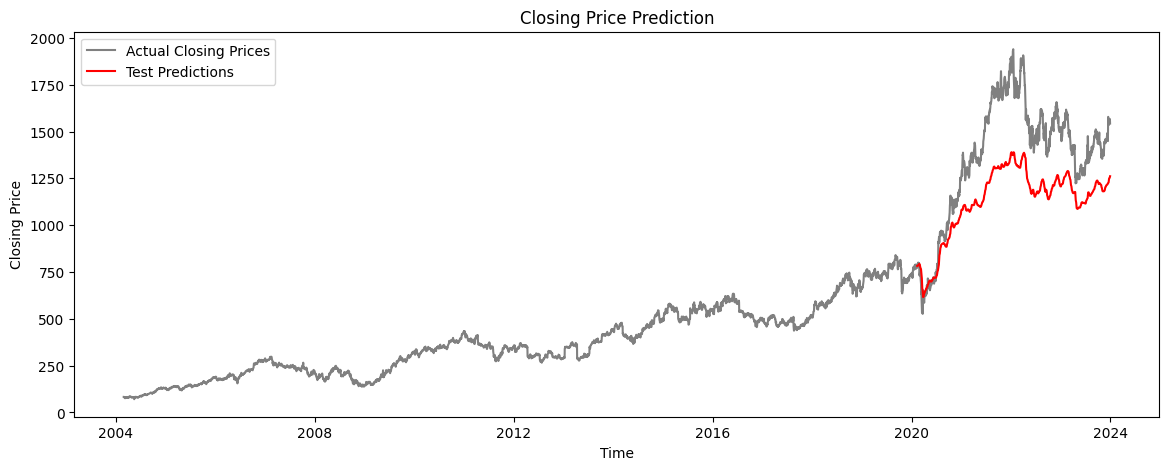

In [26]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler_close.inverse_transform(train_predictions)
test_predictions = scaler_close.inverse_transform(test_predictions)

y_train = scaler_close.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler_close.inverse_transform(y_test.reshape(-1, 1))

# Combine predictions with the actual data
train_data = np.arange(sequence_length, sequence_length + len(train_predictions))
test_data = np.arange(len(train_predictions) + sequence_length, len(train_predictions) + sequence_length + len(test_predictions))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(data.index, data_close.values, color='gray', label='Actual Closing Prices')
plt.plot(data.index[test_data], test_predictions, color='red', label='Test Predictions')
plt.title('Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [89]:
new_data = pd.read_csv('Wipro_prices_test.csv')

In [90]:
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data = new_data.drop(columns = ['Year','Month-Year','High','Low','Adj Close'])
new_data.set_index('Date', inplace=True)
new_data

,Open,Close,Volume,Adjustments On Amalgamation Merger Demerger Others,Asset Turnover Ratio (%),Basic EPS (Rs.),Bonus Equity Share Capital,Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Capital Goods,...,Total Current Liabilities,Total Debt/Equity (X),Total Non-Current Assets,Total Non-Current Liabilities,Total Reserves and Surplus,Total Share Capital,Total Shareholders Funds,Trade Payables,Trade Receivables,Trade/Other Goods
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,473.000000,477.149994,10173639,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-02,478.000000,469.200012,7141257,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-03,463.899994,455.899994,9767182,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-04,457.000000,452.399994,7585168,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-05,455.049988,456.600006,8444565,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-08,457.500000,450.350006,5041443,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-09,458.000000,450.750000,7232524,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-10,451.450012,453.600006,4437338,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-11,454.950012,448.200012,4319409,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0


In [91]:
# Print the columns of the DataFrame to see what is available
print(new_data.shape)
print(data.shape)
new_data

(40, 89)
(4908, 17)


,Open,Close,Volume,Adjustments On Amalgamation Merger Demerger Others,Asset Turnover Ratio (%),Basic EPS (Rs.),Bonus Equity Share Capital,Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Capital Goods,...,Total Current Liabilities,Total Debt/Equity (X),Total Non-Current Assets,Total Non-Current Liabilities,Total Reserves and Surplus,Total Share Capital,Total Shareholders Funds,Trade Payables,Trade Receivables,Trade/Other Goods
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,473.000000,477.149994,10173639,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-02,478.000000,469.200012,7141257,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-03,463.899994,455.899994,9767182,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-04,457.000000,452.399994,7585168,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-05,455.049988,456.600006,8444565,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-08,457.500000,450.350006,5041443,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-09,458.000000,450.750000,7232524,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-10,451.450012,453.600006,4437338,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0
2024-01-11,454.950012,448.200012,4319409,0,0.82,16.75,1094.34,114.36,114.36,0,...,18842.8,0.08,31329.8,3702.5,61101.5,1097.6,62762.3,5300.2,13273.2,0


In [92]:
# Check data types and missing values
print(data_scaled.dtypes)
print(data_scaled.isnull().sum())

Low                                 float64
Close                               float64
Volume                              float64
Basic EPS                           float64
Employees Cost                      float64
Equity Share Capital                float64
Net Profit/(Loss) For the Period    float64
Net Sales/Income from operations    float64
Other Expenses                      float64
Other Income                        float64
P/L After Tax                       float64
P/L Before Tax                      float64
Quick Ratio                         float64
ROA                                 float64
ROCE                                float64
ROE                                 float64
dtype: object
Low                                 0
Close                               0
Volume                              0
Basic EPS                           0
Employees Cost                      0
Equity Share Capital                0
Net Profit/(Loss) For the Period    0
Net Sales/Income

In [93]:
scaled_new_data = scaler.transform(new_data)
scaled_new_data = pd.DataFrame(scaled_new_data, columns=new_data.columns)
y_new = scaled_new_data['Close']

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Adjustments On Amalgamation Merger Demerger Others
- Asset Turnover Ratio (%)
- Basic EPS (Rs.)
- Bonus Equity Share Capital
- Book Value [ExclRevalReserve]/Share (Rs.)
- ...
Feature names seen at fit time, yet now missing:
- Basic EPS
- Employees Cost
- Low
- Net Profit/(Loss) For the Period
- Net Sales/Income from operations
- ...


In [ ]:
sequence_length = 5  # This should be the same as used in training

def create_sequences_for_prediction(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length]
        sequences.append(sequence)  # Append just the sequence, no labels
    return sequences
    
# Convert sequences to the format required by your model
sequences_new = create_sequences_for_prediction(pd.DataFrame(scaled_new_data, columns=data_scaled.columns), sequence_length)
sequences_y = create_sequences_for_prediction(pd.Series(y_new), sequence_length)
X_new = np.array([seq.values for seq in sequences_new])  # Convert list of DataFrames to a 3D numpy array

# Reshape X_new to be 3-dimensional (if necessary, depending on model input requirements)
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], X_new.shape[2]))
predicted_values = model.predict(X_new)


In [397]:
sequences_y[0][1]

0.6269393440108916

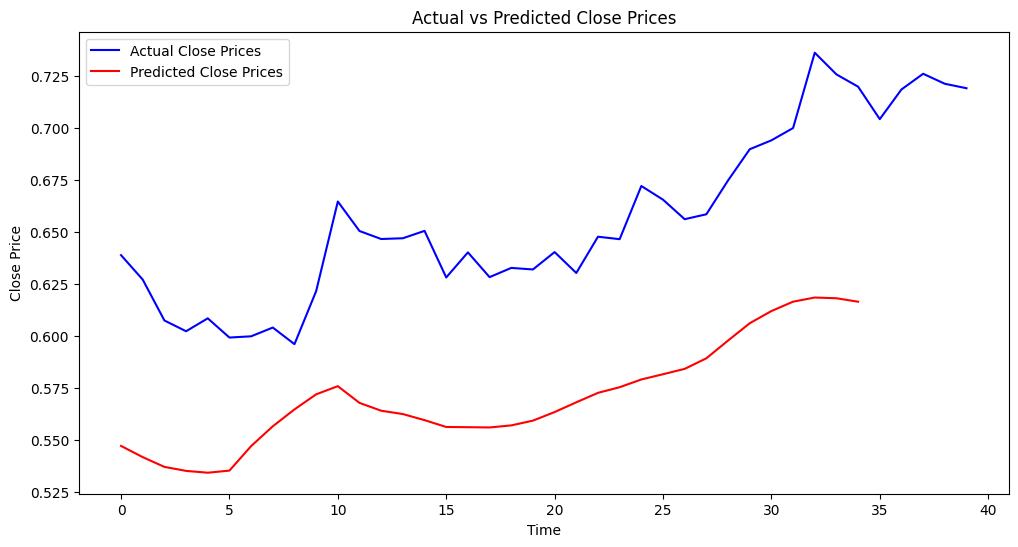

(40,)

In [398]:

dates = pd.date_range(start='2024-01-01', periods=len(predicted_close_prices))  # Replace with actual dates

# Convert predictions to a suitable format if necessary

# Rescale the predicted close prices back to the original scale
plt.figure(figsize=(12, 6))
plt.plot(scaled_new_data['Close'], color='blue', label='Actual Close Prices')
plt.plot(predicted_values, color='red', label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
y_new.shape

In [115]:
actual_close_prices = new_data['Close'][sequence_length:].values

In [116]:
actual_close_prices.shape

(35,)